### PREMISE
#### A Housing Finance company dealing in all home loans. They have presence across all urban, semi urban and rural areas. 
Customer first apply for home loan after that company validates the customer eligibility for loan.

### PROBLEM STATEMENT :-
#### Company wants to automate the loan eligibility process (real time) based on customer details provided while filling the online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

To automate this process, the company wants to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
import warnings
warnings.filterwarnings("ignore")

In [177]:
data = pd.read_csv('loan_data_set.csv')

In [178]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [179]:
data.shape

(614, 13)

### EDA & Data Preprocessing

In [180]:
data.iloc[:, 5:9].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

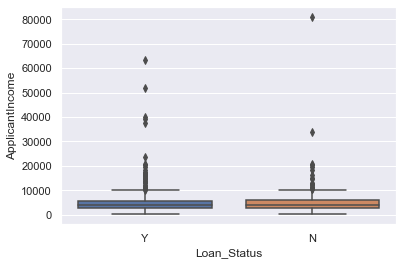

In [181]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)

In [182]:
data[data['ApplicantIncome'] == 81000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [183]:
# data.drop(data[data['ApplicantIncome'] == 81000].index, axis=0, inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

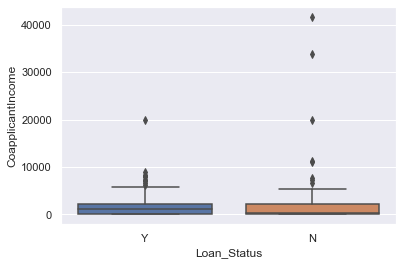

In [184]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)

In [185]:
data[data['CoapplicantIncome'] == 41667]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [186]:
# data.drop(data[data['CoapplicantIncome'] == 33837].index, axis=0, inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

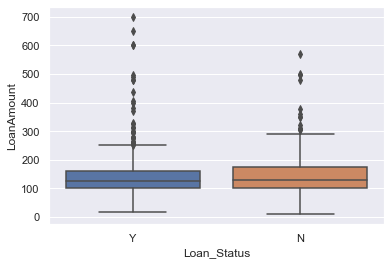

In [187]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)

### Data Cleaning

In [188]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [189]:
data.dropna(inplace=True)

In [190]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Encoding

In [191]:
data.replace({'Loan_Status': {"Y": 1, "N": 0}}, inplace=True)

In [192]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [193]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [194]:
data.Dependents = data.Dependents.replace(to_replace='3+', value=4)

In [195]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,480,480,480,480,480,480,480
unique,480,2,2,4,2,2,3
top,LP001003,Male,Yes,0,Graduate,No,Semiurban
freq,1,394,311,274,383,414,191


In [196]:
data.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [197]:
data.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

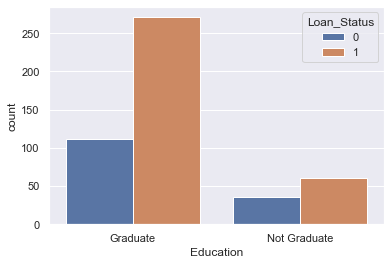

In [198]:
sns.countplot(x='Education', hue='Loan_Status', data=data)

#### Education and Loan Eligibility has high relation

<AxesSubplot:xlabel='Married', ylabel='count'>

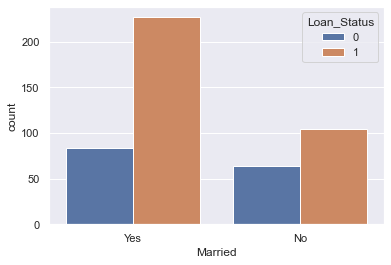

In [199]:
sns.countplot(x='Married', hue='Loan_Status', data=data)

#### Married and Getting the loan is also highly related in the data

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

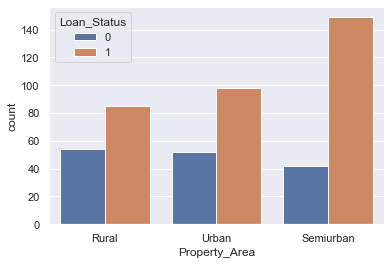

In [200]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

#### Semi-urban area has the highest no. of customers who are eligible for loan. We can take semi-urban areas as tier-2 / tier-3 cities

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

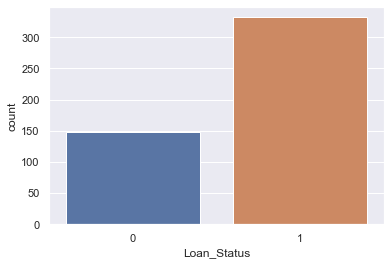

In [201]:
sns.countplot(x='Loan_Status', data=data)

### Data Encoding

In [202]:
data.replace({'Gender': {'Male': 1, 'Female': 0}, 'Married': {'No': 0, 'Yes': 1}, 'Education': {'Graduate': 1, 'Not Graduate': 0},
             'Self_Employed': {'Yes': 1, 'No': 0}, 'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0}}, inplace=True)

In [203]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 68.7+ KB


In [205]:
data.drop('Loan_ID', axis=1, inplace=True)

In [206]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


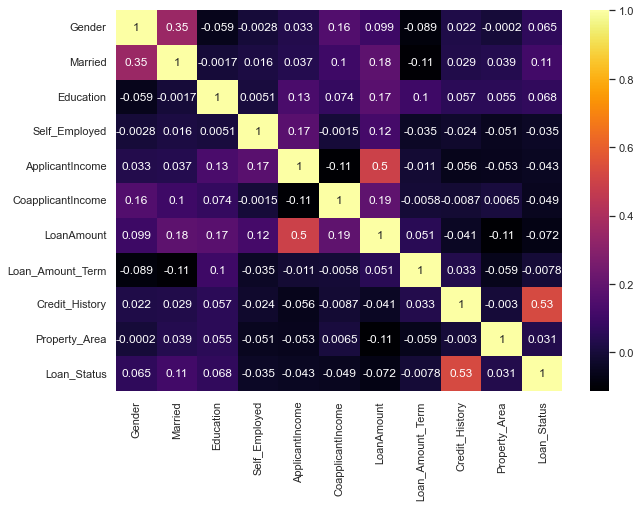

In [207]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

#### Credit History has the maximum correlation with Loan Status

#### Also, Loan Amount is having correlation with Applicant Income, which seems obvious

In [208]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


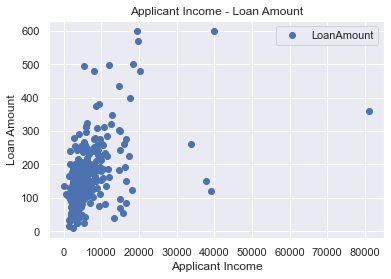

In [209]:
data.plot(x='ApplicantIncome', y='LoanAmount', style='o')  
plt.title('Applicant Income - Loan Amount')  
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')  
plt.show()

In [210]:
# Square Root Transformation

data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

In [211]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,1,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,0,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,1,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
5,1,1,2,1,1,73.600272,64.776539,16.340135,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
610,1,1,4,1,0,64.078077,0.000000,6.324555,180.0,1.0,0,1
611,1,1,1,1,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
612,1,1,2,1,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


In [212]:
X = data.iloc[:, :-1]
y = data.Loan_Status

In [213]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0,1,1,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0,0,0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0,1,0,77.459667,0.000000,11.874342,360.0,1.0,2
5,1,1,2,1,1,73.600272,64.776539,16.340135,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,53.851648,0.000000,8.426150,360.0,1.0,0
610,1,1,4,1,0,64.078077,0.000000,6.324555,180.0,1.0,0
611,1,1,1,1,0,89.844310,15.491933,15.905974,360.0,1.0,2
612,1,1,2,1,0,87.080423,0.000000,13.674794,360.0,1.0,2


In [214]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Balancing the dataset

In [215]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [216]:
from imblearn.over_sampling import SMOTE

In [217]:
X, y = SMOTE().fit_resample(X, y)

In [218]:
y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

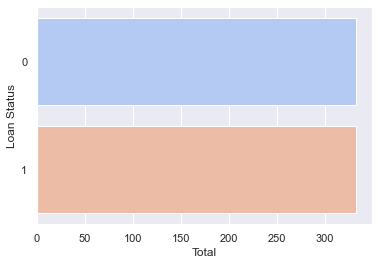

In [219]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [220]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

#### FEATURE IMPORTANCE

In [221]:
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 0, 'Feature Importance')

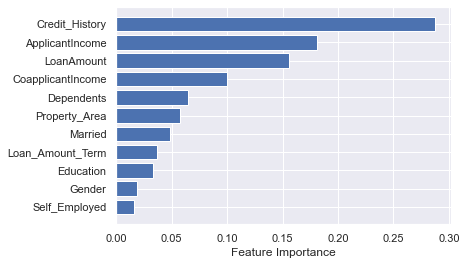

In [222]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [224]:
X_train

array([[1.        , 0.        , 0.        , ..., 0.72972973, 0.47354551,
        1.        ],
       [1.        , 1.        , 0.5       , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.25      , ..., 0.32432432, 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.72972973, 0.75179687,
        0.5       ],
       [0.        , 0.        , 0.41831504, ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ]])

In [225]:
X_test

array([[1.        , 1.        , 0.5       , ..., 0.72972973, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 0.        , 0.25      , ..., 0.72972973, 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.16041875, ..., 0.72972973, 0.64167498,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.59459459, 1.        ,
        0.5       ]])

In [226]:
y_train

629    0
437    1
192    1
31     1
34     1
      ..
443    0
93     1
522    0
604    0
435    1
Name: Loan_Status, Length: 531, dtype: int64

In [227]:
y_test

268    1
110    1
221    0
529    0
62     0
      ..
5      1
461    1
617    0
81     1
393    1
Name: Loan_Status, Length: 133, dtype: int64

### Model Selection

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### KNN

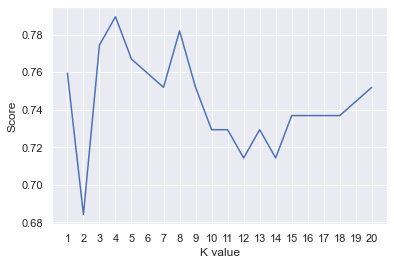

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        67
           1       0.73      0.79      0.76        66

    accuracy                           0.75       133
   macro avg       0.75      0.75      0.75       133
weighted avg       0.75      0.75      0.75       133

KNN accuracy: 74.40%


In [229]:
scoreknn = []
for i in range(1,21):
    KNNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNNclassifier.fit(X_train, y_train)
    scoreknn.append(KNNclassifier.score(X_test, y_test))
    
y_pred = KNNclassifier.predict(X_test)
    
plt.plot(range(1,21), scoreknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNNacc = np.mean(scoreknn)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

print("KNN accuracy: {:.2f}%".format(KNNacc*100))

### Decision Tree

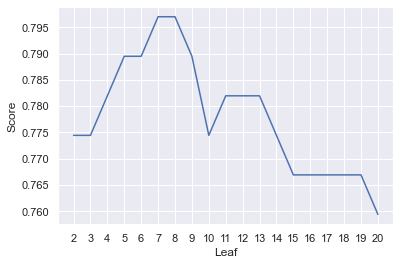

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        67
           1       0.74      0.79      0.76        66

    accuracy                           0.76       133
   macro avg       0.76      0.76      0.76       133
weighted avg       0.76      0.76      0.76       133

Decision Tree Accuracy: 77.80%


In [230]:
scoreDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreDT.append(DTclassifier.score(X_test, y_test))
    
y_pred = DTclassifier.predict(X_test)
    
plt.plot(range(2,21), scoreDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTacc = np.mean(scoreDT)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

print("Decision Tree Accuracy: {:.2f}%".format(DTacc*100))

In [231]:
# LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
# LRclassifier.fit(X_train, y_train)

# y_pred = LRclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# # print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# LRacc = accuracy_score(y_pred,y_test)
# print('LR accuracy: {:.2f}%'.format(LRacc*100))

### Random Forest

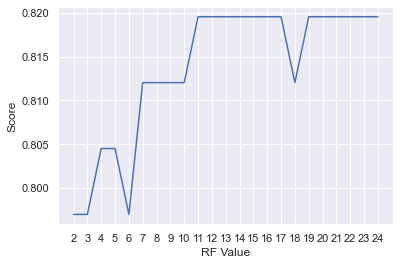

Random Forest Accuracy:  81.37%


In [244]:
scoreRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 500, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFacc = np.mean(scoreRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFacc*100))

In [243]:
compare = pd.DataFrame({'Model': ['K Neighbors', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [KNNacc*100, DTacc*100, RFacc*100]})

compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,81.006865
1,Decision Tree,77.799763
0,K Neighbors,74.398496


#### Random Forest has the best accuracy, it can be used further for predictions

### Model training, HyperParam tuning & Evaluation

In [245]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 250, 500], 'max_features': [5, 6, 7]}
grid = GridSearchCV(rfc, parameters)

In [246]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 6, 7],
                         'n_estimators': [100, 200, 250, 500]})

In [247]:
grid.best_params_

{'max_features': 5, 'n_estimators': 200}

In [248]:
pred = grid.best_estimator_.predict(X_test)

In [249]:
confusion_matrix(y_test,pred)

array([[56, 11],
       [10, 56]], dtype=int64)

In [250]:
print("Accuracy score: {0}%".format((accuracy_score(y_test,pred)*100).round(2)))

Accuracy score: 84.21%


In [251]:
# interpret & denormalize

In [252]:
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1], dtype=int64)